Data Loading

In [57]:
import pandas as pd

df = pd.read_csv("heart.csv")

Exploratory Data Analysis (EDA)

In [58]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [59]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [60]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [61]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


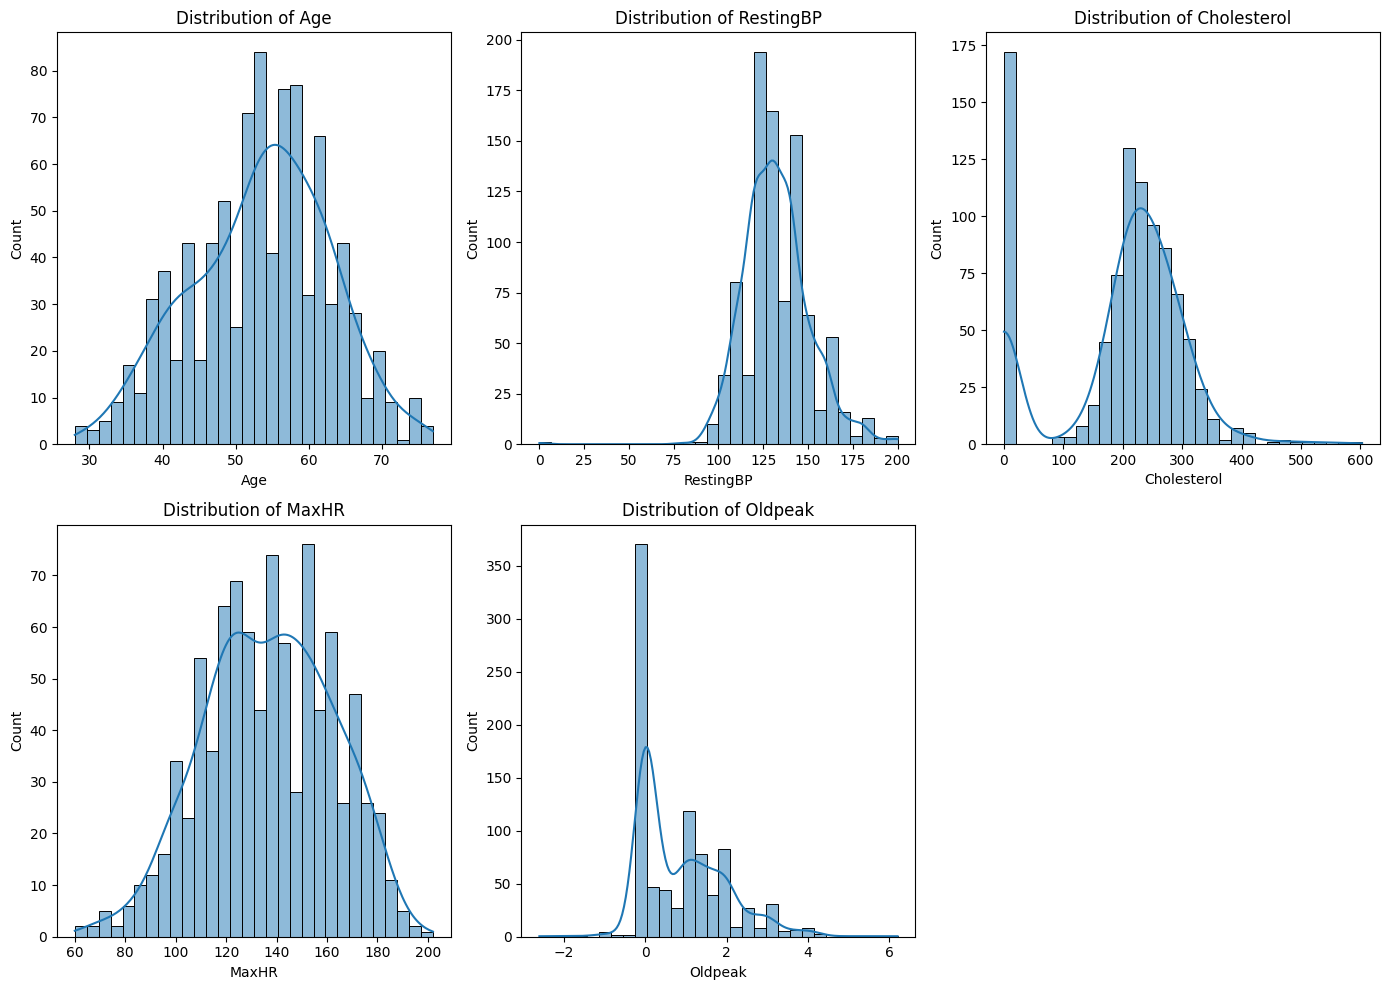

In [62]:
# Visualize the distribution of numerical features

import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

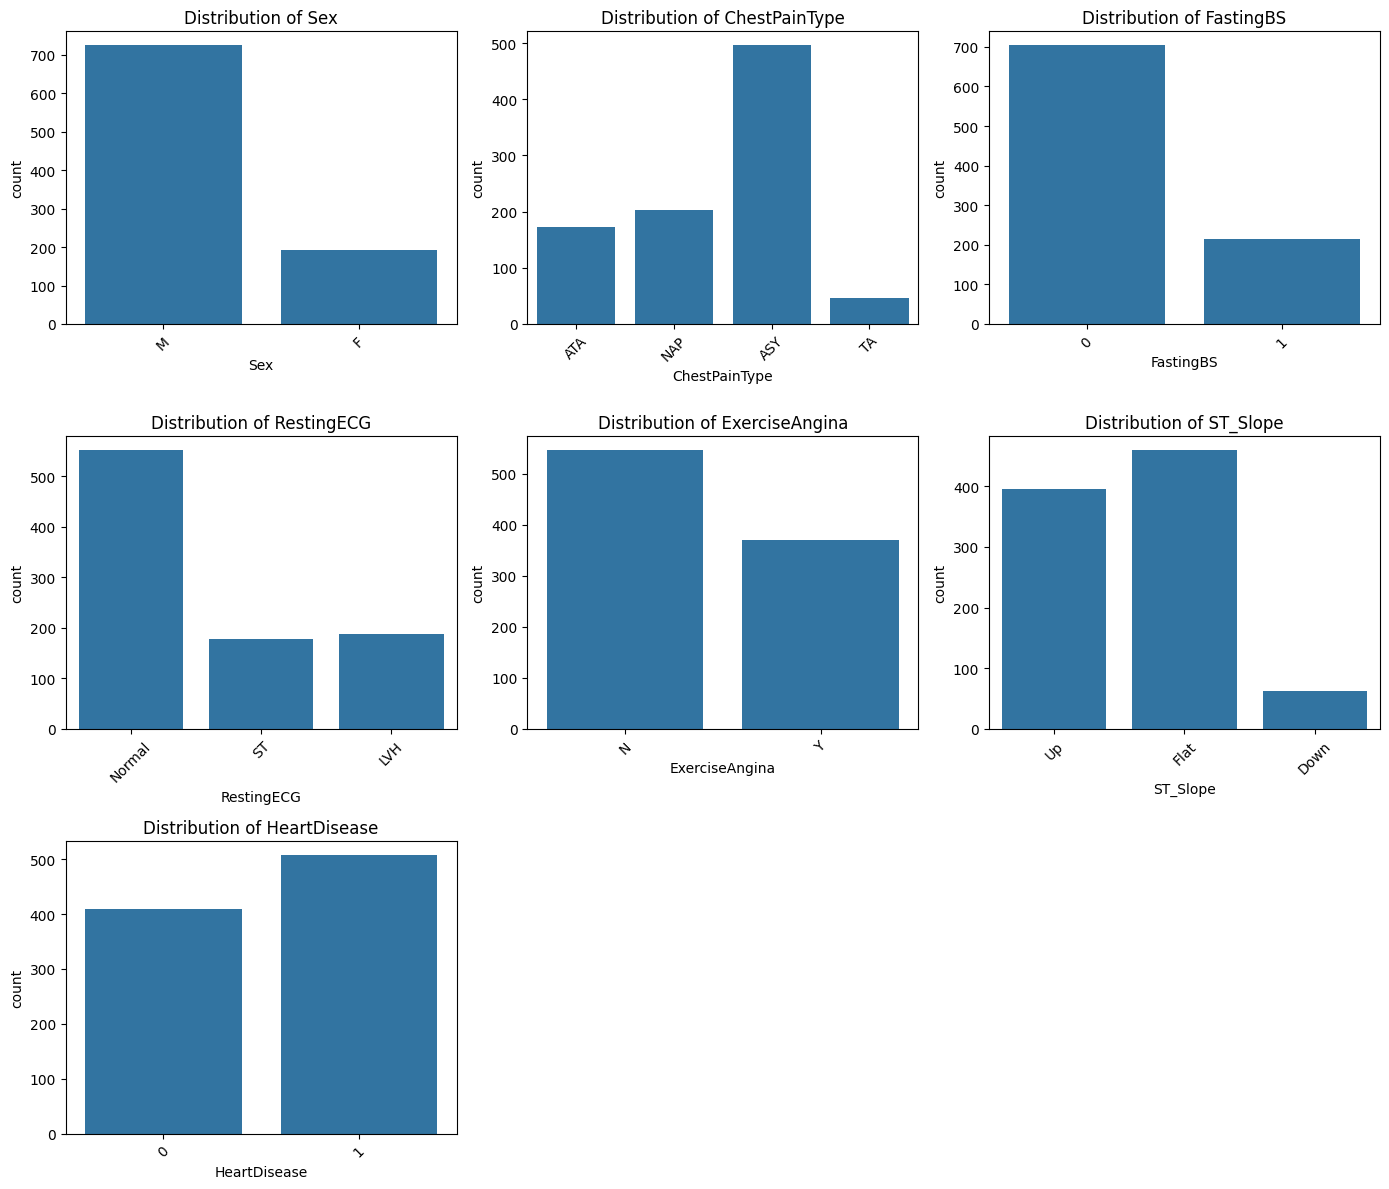

In [63]:
# Visualize the distribution of categorical features

import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

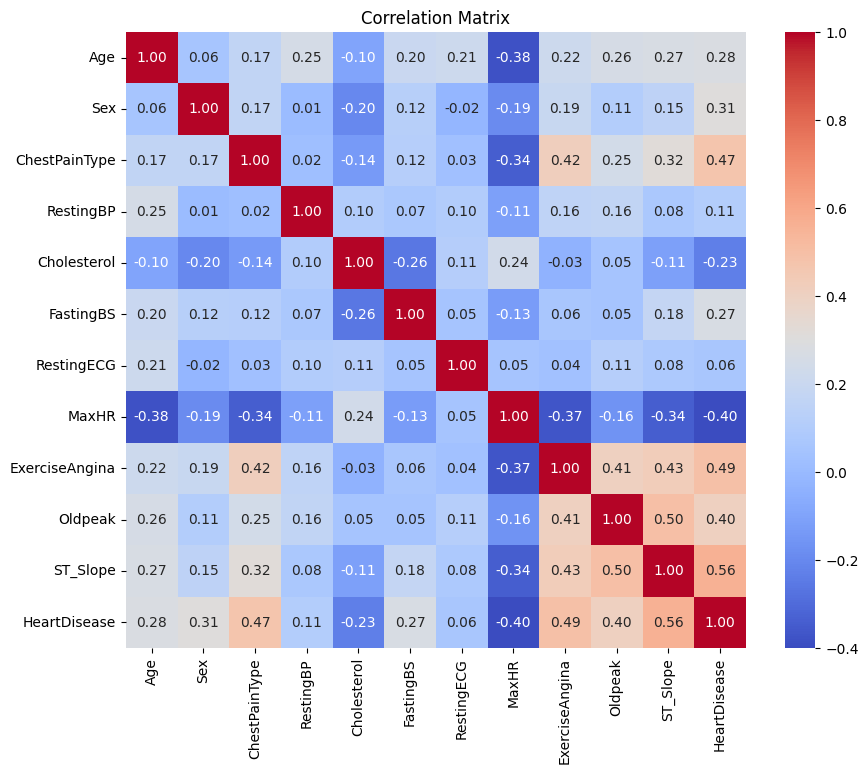

In [64]:
# Encode categorical variables for correlation matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})
df_encoded['ChestPainType'] = df_encoded['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df_encoded['RestingECG'] = df_encoded['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map({'Y': 1, 'N': 0})
df_encoded['ST_Slope'] = df_encoded['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

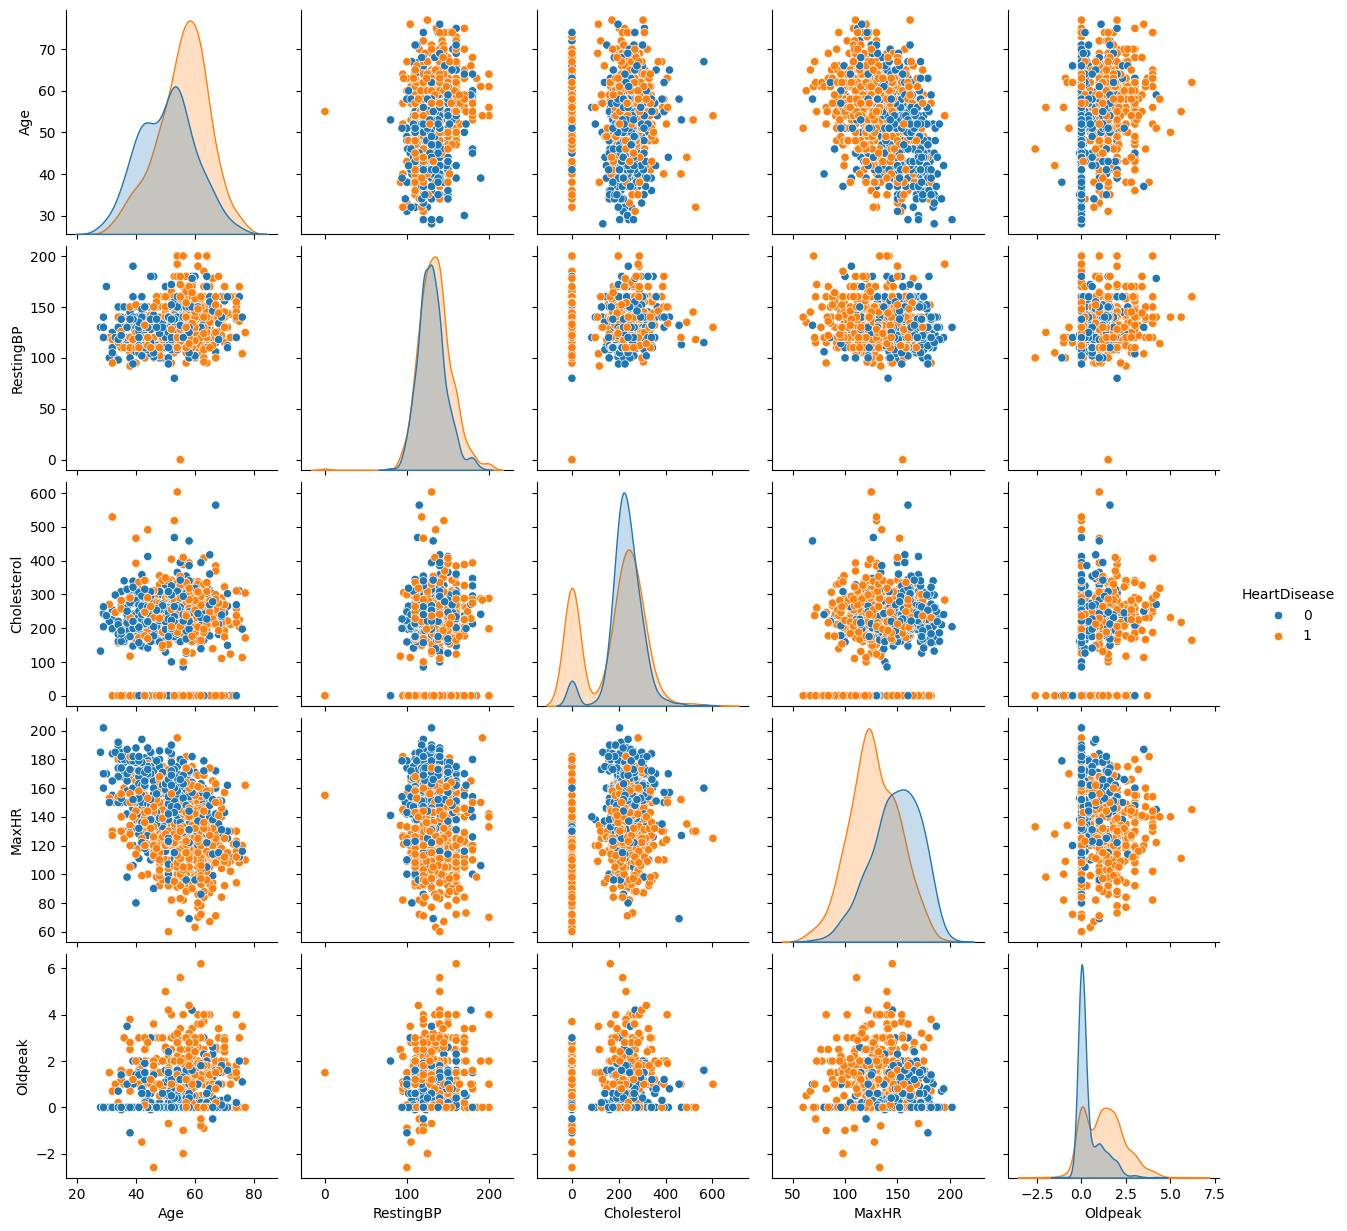

In [65]:
sns.pairplot(df[num_features + ['HeartDisease']], hue='HeartDisease')
plt.show()

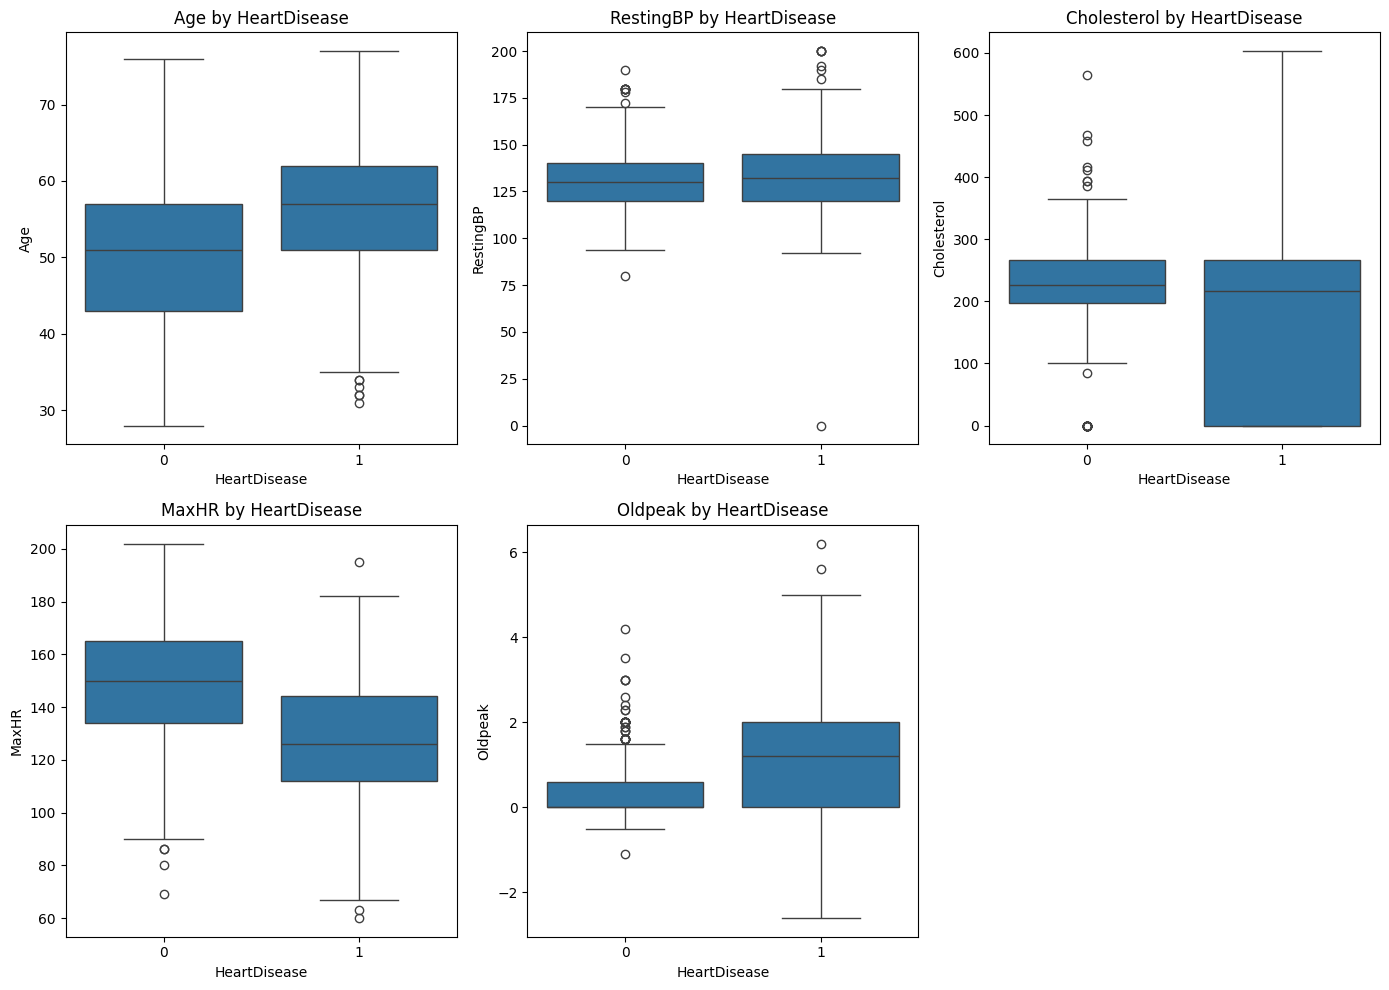

In [66]:
# Boxplots to examine the distribution of numerical features by HeartDisease
plt.figure(figsize=(14, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='HeartDisease', y=feature)
    plt.title(f'{feature} by HeartDisease')
plt.tight_layout()
plt.show()

Feature Encoding

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# List of numerical and categorical features
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create the preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features)
    ], remainder='passthrough')

# Apply the transformations
X_encoded = preprocessor.fit_transform(X)

# Convert the result to a DataFrame for better readability
encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
all_feature_names = list(encoded_feature_names) + num_features
X_encoded_df = pd.DataFrame(X_encoded, columns=all_feature_names)

# Display the first few rows of the encoded dataset
print("First 5 rows of the encoded dataset:")
print(X_encoded_df.head())


First 5 rows of the encoded dataset:
   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  FastingBS_1  \
0    1.0                1.0                0.0               0.0          0.0   
1    0.0                0.0                1.0               0.0          0.0   
2    1.0                1.0                0.0               0.0          0.0   
3    0.0                0.0                0.0               0.0          0.0   
4    1.0                0.0                1.0               0.0          0.0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                1.0            0.0               0.0            0.0   
1                1.0            0.0               0.0            1.0   
2                0.0            1.0               0.0            0.0   
3                1.0            0.0               1.0            1.0   
4                1.0            0.0               0.0            0.0   

   ST_Slope_Up   Age  RestingBP  Cholestero

Feature Scaling

First 5 rows of the scaled dataset:
      Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0  0.515952           2.075177          -0.532838         -0.229679   
1 -1.938163          -0.481887           1.876744         -0.229679   
2  0.515952           2.075177          -0.532838         -0.229679   
3 -1.938163          -0.481887          -0.532838         -0.229679   
4  0.515952          -0.481887           1.876744         -0.229679   

   FastingBS_1  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0    -0.551341           0.814275      -0.490449         -0.823556   
1    -0.551341           0.814275      -0.490449         -0.823556   
2    -0.551341          -1.228087       2.038947         -0.823556   
3    -0.551341           0.814275      -0.490449          1.214246   
4    -0.551341           0.814275      -0.490449         -0.823556   

   ST_Slope_Flat  ST_Slope_Up       Age  RestingBP  Cholesterol     MaxHR  \
0      -1.002181     1.150674 -1.433140

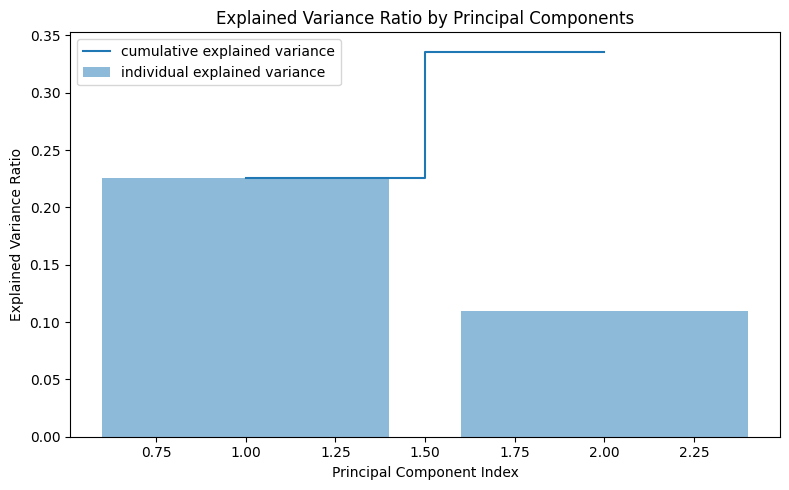

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separate the numerical features and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=all_feature_names)

# Display the first few rows of the scaled dataset
print("First 5 rows of the scaled dataset:")
print(X_scaled_df.head())

# Apply PCA for feature extraction
pca = PCA(n_components=2)  # Adjust n_components based on the variance you want to capture
X_pca = pca.fit_transform(X_scaled_df)

# Convert the PCA result to a DataFrame for better readability
pca_feature_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)

# Display the first few rows of the PCA dataset
print("First 5 rows of the PCA dataset:")
print(X_pca_df.head())

# Visualize the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Exogeneous Variables

In [69]:
# Add new feature generation steps to the preprocessing pipeline
class FeatureGenerator:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Age group
        X['AgeGroup'] = pd.cut(X['Age'], bins=[29, 40, 50, 60, 70, 80, 90], labels=['30-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
        # BP category
        X['BP_Category'] = pd.cut(X['RestingBP'], bins=[0, 120, 129, 139, 180, 200], labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'])
        # Cholesterol to Age Ratio
        X['Cholesterol_Age_Ratio'] = X['Cholesterol'] / X['Age']
        # Cholesterol to BP Ratio
        X['Cholesterol_BP_Ratio'] = X['Cholesterol'] / X['RestingBP']
        # Exercise Induced Oldpeak
        X['Exercise_Oldpeak'] = X['ExerciseAngina'].apply(lambda x: 1 if x == 'Y' else 0) * X['Oldpeak']
        # ST Slope Value
        st_slope_mapping = {'Up': 1, 'Flat': 0, 'Down': -1}
        X['ST_Slope_Value'] = X['ST_Slope'].map(st_slope_mapping)
        # Risk Score
        X['Risk_Score'] = X['Age'] * 0.1 + X['Cholesterol'] * 0.02 + X['RestingBP'] * 0.03 + X['FastingBS'] * 1 + X['MaxHR'] * -0.01 + X['Oldpeak'] * 0.5
        return X

# Update the numerical and categorical features list
num_features.extend(['Cholesterol_Age_Ratio', 'Cholesterol_BP_Ratio', 'Exercise_Oldpeak', 'ST_Slope_Value', 'Risk_Score'])
cat_features.extend(['AgeGroup', 'BP_Category'])

# Update the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', 'passthrough', num_features)
    ], remainder='drop')

# Create a full pipeline with feature generation and preprocessing
full_pipeline = Pipeline(steps=[
    ('feature_gen', FeatureGenerator()),
    ('preprocessor', preprocessor)
])

# Apply the full pipeline
X_processed = full_pipeline.fit_transform(X)

# Convert the result to a DataFrame for better readability
processed_feature_names = full_pipeline.named_steps['preprocessor'].named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
all_feature_names = list(processed_feature_names) + num_features
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Display the first few rows of the processed dataset
print("First 5 rows of the processed dataset:")
print(X_processed_df.head())


First 5 rows of the processed dataset:
   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  FastingBS_1  \
0    1.0                1.0                0.0               0.0          0.0   
1    0.0                0.0                1.0               0.0          0.0   
2    1.0                1.0                0.0               0.0          0.0   
3    0.0                0.0                0.0               0.0          0.0   
4    1.0                0.0                1.0               0.0          0.0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                1.0            0.0               0.0            0.0   
1                1.0            0.0               0.0            1.0   
2                0.0            1.0               0.0            0.0   
3                1.0            0.0               1.0            1.0   
4                1.0            0.0               0.0            0.0   

   ST_Slope_Up  ...   Age  RestingBP  Cho

Training and Test Set split

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Drop rows with null values from X_processed_df and y
X_processed_df_clean = X_processed_df.dropna()
y_clean = y.loc[X_processed_df_clean.index]

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df_clean, y_clean, test_size=0.2, random_state=42)

Model Bulding and Training

In [71]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Classification Report': classification_report(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"ROC AUC: {metrics['ROC AUC']}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")

# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8804347826086957
ROC AUC: 0.9195188492063492
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        72
           1       0.92      0.88      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Model: Random Forest
Accuracy: 0.8695652173913043
ROC AUC: 0.9229290674603174
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        72
           1       0.89      0.90      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184


Model: Gradient Boosting
Accuracy: 0.8913043478260869
ROC AUC: 0.9357638888888888
Classification Report:
              precision    reca

Best Random Forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Define the best model with the optimal hyperparameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the best model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
accuracy_rf = accuracy_score(y_test, y_pred_rf)


print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - ROC AUC: {roc_auc_rf}")
print(f"Random Forest - Classification Report:\n{classification_report(y_test, y_pred_rf)}\n")


Random Forest - Accuracy: 0.8695652173913043
Random Forest - ROC AUC: 0.9284474206349207
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        72
           1       0.89      0.90      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184




XGBoost

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid search for best parameters
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='roc_auc')
xgb_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"XGBoost - Best parameters: {xgb_grid_search.best_params_}")
print(f"XGBoost - Best ROC AUC score: {xgb_grid_search.best_score_}")

# Evaluate the best model
xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
roc_auc_xgb = roc_auc_score(y_test, xgb_best_model.predict_proba(X_test)[:, 1])
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost - ROC AUC: {roc_auc_xgb}")
print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Classification Report:\n{classification_report(y_test, y_pred_xgb)}\n")


XGBoost - Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBoost - Best ROC AUC score: 0.9219165712761583
XGBoost - ROC AUC: 0.9350198412698412
XGBoost - Accuracy: 0.8695652173913043
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        72
           1       0.89      0.90      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184




ROC Curve

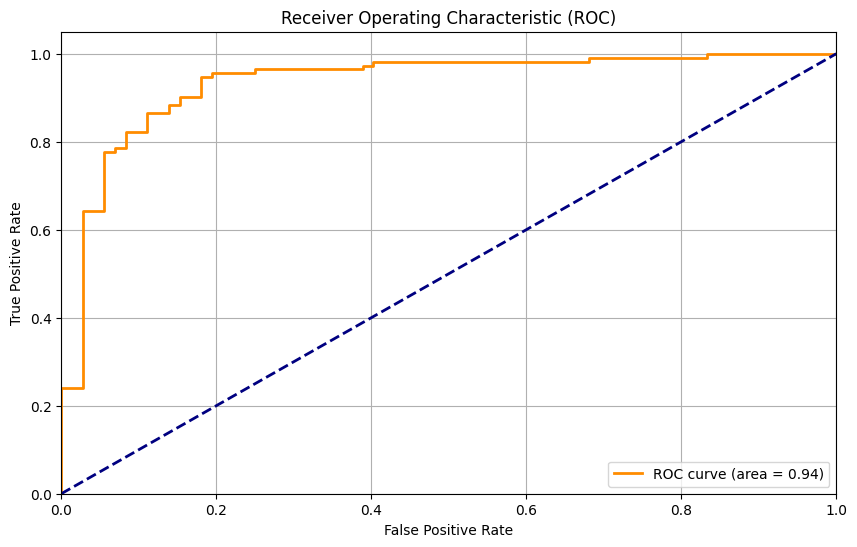

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, xgb_best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Precision-Recall Curve

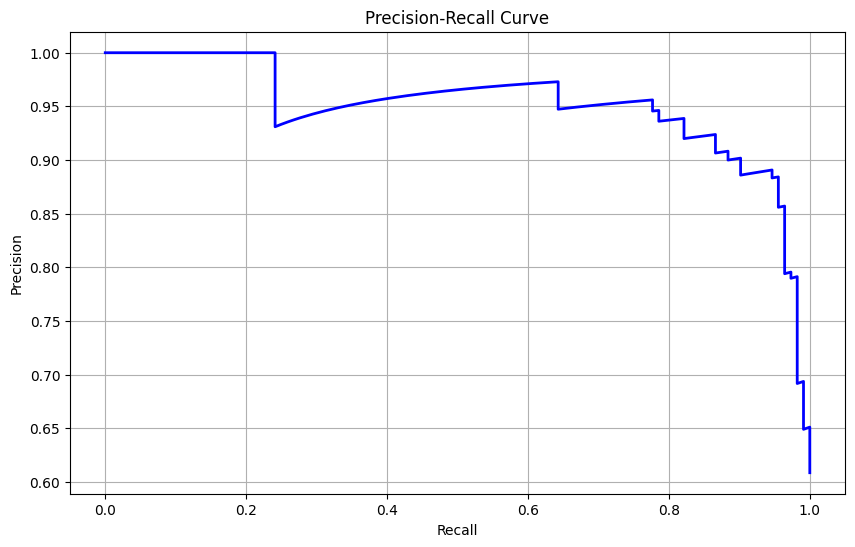

In [75]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test, xgb_best_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


Feature Importance

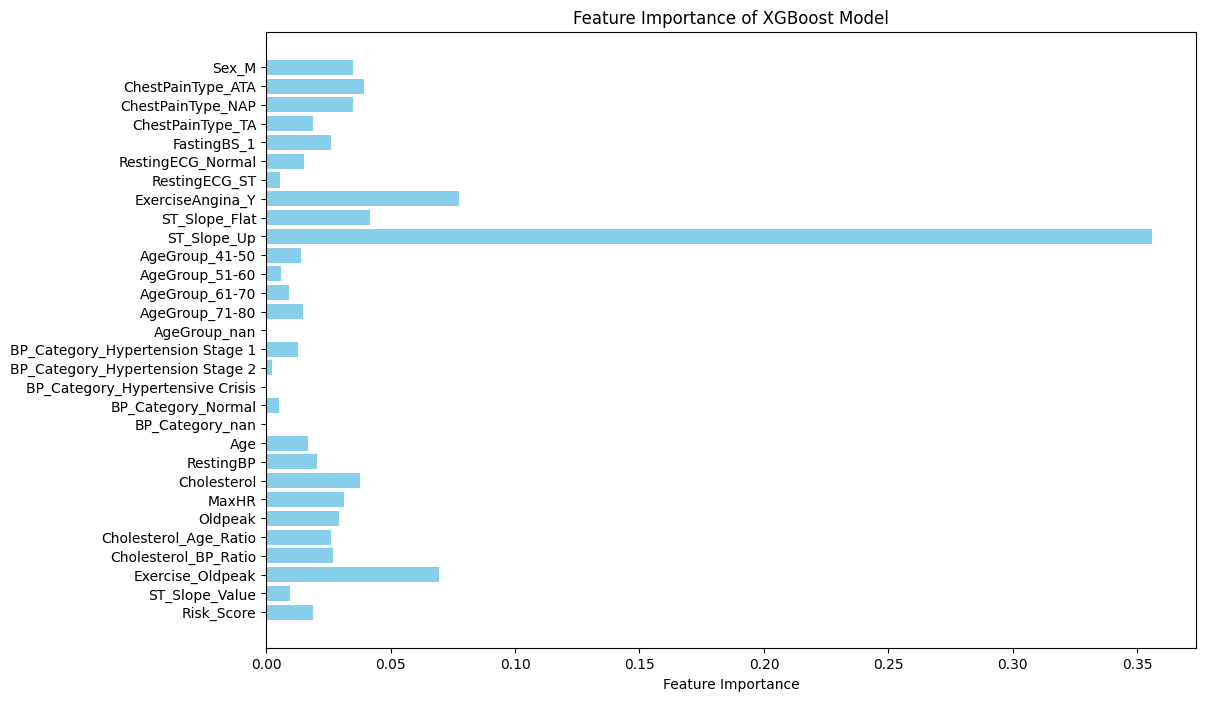

In [76]:
import xgboost as xgb

# Get feature importance
importances = xgb_best_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of XGBoost Model')
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()


Confusion Matrix

<Figure size 800x600 with 0 Axes>

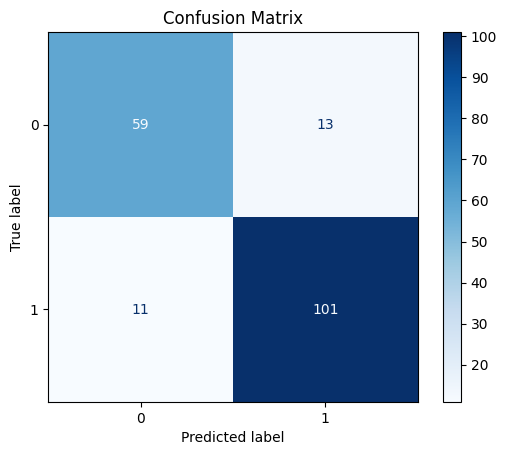

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_best_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
